**RESTAURANT RATING**

In [ ]:
#IMPORT THE REQUIRED LIBRARIES
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn import metrics

**STEP 1: READ THE DATA**

In [ ]:
#READ THE CSV FILE
df=pd.read_csv("/content/drive/My Drive/zomato.csv")
df.head()#READS THE FIRST FIVE ROWS FROM THE FILE

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
#GIVES THE STATISTICAL DATA
df.describe()


,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
count,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000,51717.000000
mean,5555.741632,4330.682754,0.588665,0.124698,42.388499,218.099658,36.034205,51.363614,1333.051240,1402.410542,41.842044,12810.801149,8028.774194,2.807375,14.202429
std,3286.922532,2554.840627,0.492080,0.330379,12.880567,421.965158,27.189000,27.583666,1555.877371,772.320041,18.170494,7261.130376,2310.914539,1.140839,8.286342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2680.000000,2055.000000,0.000000,0.000000,34.000000,6.000000,12.000000,27.000000,266.000000,698.000000,33.000000,6324.000000,9097.000000,2.000000,7.000000
50%,5485.000000,4293.000000,1.000000,0.000000,41.000000,40.000000,32.000000,46.000000,266.000000,1472.000000,44.000000,13112.000000,9097.000000,2.000000,15.000000
75%,8324.000000,6557.000000,1.000000,0.000000,50.000000,197.000000,55.000000,78.000000,2316.000000,1978.000000,55.000000,19807.000000,9097.000000,4.000000,20.000000
max,11494.000000,8791.000000,1.000000,1.000000,63.000000,2327.000000,92.000000,92.000000,5270.000000,2722.000000,69.000000,22512.000000,9097.000000,6.000000,29.000000


In [ ]:
#SHAPE OF THE DATA
df.shape


(51717, 15)

**STEP 2: DATA PREPROCESSING**

In [ ]:
#NOW THE PREPROCESSING OF THE DATA BEGINS
#FIRST CHECK WHETHER THE DATA HAS NULL VALUES
df.isnull().sum()

address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)        0
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
#IF NULL VALUES ARE FOUND CONVERT THEM BY USING MODE FOR CATAGORICAL COLUMN OR MEDIAN FOR NUMERIC COLUMN
df['rate']=df['rate'].fillna(df['rate'].mode()[0]) # Mode for categorical column
df['approx_cost(for two people)']=df['approx_cost(for two people)'].fillna(df['approx_cost(for two people)'].mode()[0]) # Mode for categorical column
df['cuisines']=df['cuisines'].fillna(df['cuisines'].mode()[0]) # Mode for categorical column
df['location']=df['location'].fillna(df['location'].mode()[0]) # Mode for categorical column
df['rest_type']=df['rest_type'].fillna(df['rest_type'].mode()[0]) # Mode for categorical column
df['dish_liked']=df['dish_liked'].fillna(df['dish_liked'].mode()[0]) # Mode for categorical column
df['phone']=df['phone'].fillna(df['phone'].mode()[0]) 
df.isnull().sum()

url                            0
address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
phone                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [ ]:
#NOW REMOVE THE IRRELEVANT COLUMNS
df = df.drop(["url","phone"],axis=1)
df.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [ ]:
df.describe()


,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [ ]:
#NORMALIZE THE DATA
var_mod = df.columns
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])


In [ ]:
df.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,8016,3690,1,1,46,767,1,27,3651,2159,66,10851,9097,0,1
1,3844,7022,1,0,46,778,1,27,2964,952,66,12530,9097,0,1
2,784,6499,1,0,40,887,1,22,1416,766,66,4652,9097,0,1


Text(0, 0.5, 'rate')

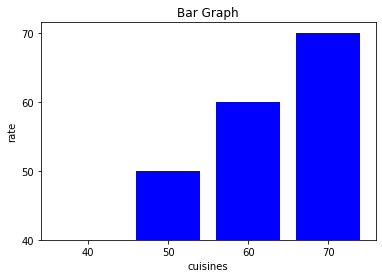

In [ ]:
#GRAPHICAL REPRESENTATION OF THE DATA
cuisines=["40","50","60","70"]
rate=["40","50","60","70"]
plt.bar(cuisines,rate,color="blue")
plt.title("Bar Graph")#Gives title to the graph
plt.xlabel("cuisines")#Gives name to x axis
plt.ylabel("rate")#Gives name to y axis


In [ ]:
#SPLIT THE DATA INTO TEST AND TRAIN PART
X = df.drop('rate', axis=1)#INPUT COLUMNS
y = df['rate']#OUTPUT COLUMN
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)#20% OF DATA IS GIVEN FOR TESTING

In [ ]:
#STANDARDIZATION OF TEST AND TRAIN DATA
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**APPLY VARIOUS ALGORITHMS**
**(THIS INCLUDES STEP 3: TRAINING , STEP 4: TESTING , STEP 5: DEPLOYING)**

**1.LOGISTIC REGRESSION**

In [ ]:
#STEP 3: TRAINING
#IMPORT THE REQUIRED LIBRARY
from sklearn.linear_model import LogisticRegression
my_model_1 = LogisticRegression()
result_1 = my_model_1.fit(X_train, y_train)

In [ ]:
predictions_1 = result_1.predict(X_test)
predictions_1

array([63, 46, 38, ..., 26, 39, 38])

In [ ]:
#STEP 4: TESTING
#CHECK THE ACCURACY

accuracy_score(y_test, predictions_1)

0.28721964423820573

In [ ]:
#CHECK THE CONFUSION MATRIX
confusion_mat_1 = confusion_matrix(y_test, predictions_1)
confusion_df_1 = pd.DataFrame(confusion_mat_1)
confusion_df_1

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,2,1,0,0,1,0,0
58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0
60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,2,0,0,0,0,0,0,1,1,0,0,0,1,0


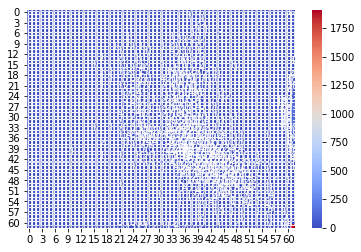

In [ ]:
#CONFUSION MATRIX IN FORM OF HEATMAP
Color_conf_matrix_1 = sns.heatmap(confusion_df_1, cmap='coolwarm',annot = True)

In [ ]:
#CHECK THE CLASSIFICATION REPORT
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions_1))


**Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00         9
          15       0.00      0.00      0.00        28
          16       0.00      0.00      0.00        32
          17       0.50      0.03      0.06        30
          18       0.00      0.00      0.00        31


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#STEP 5: DEPLOY THE MODEL
pred_new_1=my_model_1.predict([[3844,7022,1,0,46,778,1,27,2964,952,66,12530,9097,0]])
pred_new_1

array([11])

**2.Desicion Tree**

In [ ]:
#STEP 3: TRAINING
#IMPORT THE REQUIRED LIBRARY
from sklearn.tree import DecisionTreeClassifier
my_model_2 = DecisionTreeClassifier(random_state=0)
result_2 = my_model_2.fit(X_train,y_train)

In [ ]:
predictions_2 = result_2.predict(X_test)
predictions_2

array([63, 43, 30, ..., 28, 38, 44])

In [ ]:
#STEP 4: TESTING
#CHECK THE ACCURACY
accuracy_score(y_test,predictions_2)

0.7869296210363496

In [ ]:
#CHECK THE CONFUSION MATRIX
confusion_mat_2 = confusion_matrix(y_test, predictions_2)
confusion_df_2 = pd.DataFrame(confusion_mat_2)
confusion_df_2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,7,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0
60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0


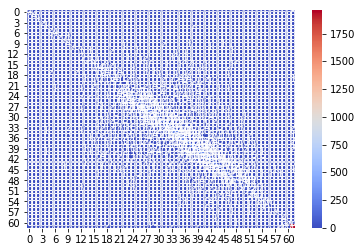

In [ ]:
#CONFUSION MATRIX IN THE FORM OF HEAT MAP
Color_conf_matrix_2 = sns.heatmap(confusion_df_2, cmap='coolwarm',annot = True)

In [ ]:
#CHECK THE CLASSIFICATION REPORT
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions_2))


**Classification Report:
               precision    recall  f1-score   support

           0       0.31      0.33      0.32        12
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       0.33      0.33      0.33         3
           7       0.40      1.00      0.57         2
           8       0.80      1.00      0.89         4
           9       1.00      0.50      0.67         4
          10       0.88      1.00      0.93         7
          11       0.40      0.50      0.44         8
          12       1.00      0.78      0.88         9
          13       0.71      0.45      0.56        11
          14       0.50      0.78      0.61         9
          15       0.70      0.75      0.72        28
          16       0.76      0.78      0.77        32
          17       0.57      0.53      0.55        30
          18       0.59      0.77      0.67        31


In [ ]:
#STEP 5: DEPLOY
pred_new_2=list(result_2.predict([[3844,7022,1,0,46,778,1,27,2964,952,66,12530,9097,0]]))
pred_new_2

[44]

**3.Random Forest**

In [ ]:
#STEP 3: TRAINING
#IMPORT REQUIRED LIBRARIES
from sklearn.ensemble import RandomForestClassifier
my_model_3 = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state =50)
result_3=my_model_3.fit(X_train, y_train)

In [ ]:
predictions_3 = result_3.predict(X_test)
predictions_3

array([63, 44, 30, ..., 34, 38, 44])

In [ ]:
#STEP 4: TESTING
#CHECK THE ACCURACY
print("Accuracy:",metrics.accuracy_score(y_test, predictions_3))

Accuracy: 0.8452242846094354


In [ ]:
#CHECK THE CONFUSIN MATRIX
confusion_mat_3 = confusion_matrix(y_test, predictions_3)
confusion_df_3 = pd.DataFrame(confusion_mat_3)
confusion_df_3

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
1,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,1,7,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0
59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0
60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0


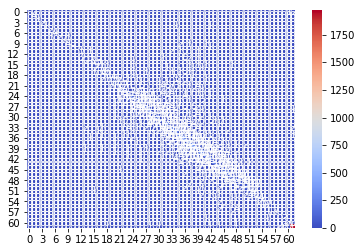

In [ ]:
#CONFUSION MATRIX IN THE FORM OF HEAT MAP
sns.heatmap(confusion_df_3, cmap='coolwarm', annot=True)

In [ ]:
#CHECK THE CLASSIFICATION REPORT
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions_3))


**Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2
           6       1.00      0.33      0.50         3
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         4
           9       1.00      0.50      0.67         4
          10       1.00      1.00      1.00         7
          11       0.80      0.50      0.62         8
          12       1.00      0.89      0.94         9
          13       1.00      0.45      0.62        11
          14       0.88      0.78      0.82         9
          15       0.88      0.75      0.81        28
          16       0.82      0.72      0.77        32
          17       0.90      0.63      0.75        30
          18       0.79      0.87      0.83        31


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#STEP 5 : DEPLOY THE MODEL
pred_new_3 = result_3.predict([[3844,7022,1,0,46,778,1,27,2964,952,66,12530,9097,0]])
pred_new_3

array([40])

**4.KNN**

In [ ]:
#STEP 3: TRAINING
#IMPORT THE REQUIRED LIBRARIES
from sklearn.neighbors import KNeighborsClassifier
my_model_4 = KNeighborsClassifier(n_neighbors = 3)#HERE K=3
result_4 = my_model_4.fit(X_train,y_train)

In [ ]:
predictions_4 = result_4.predict(X_test)
predictions_4


array([63, 44, 31, ..., 34, 13, 43])

In [ ]:
#STEP 4: TESTING
#CHECK THE ACCURACY
print('With KNN (K=3) accuracy is: ', result_4.score(X_test,y_test))

With KNN (K=3) accuracy is:  0.4443155452436195


In [ ]:
#CHECK THE CONFUSION MATRIX
confusion_mat_4 = confusion_matrix(y_test, predictions_4)
confusion_df_4 = pd.DataFrame(confusion_mat_4)
confusion_df_4


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11
1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,0,0,0,0,2,1,2,0,1,0,0
58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0
59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0
60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,4,0


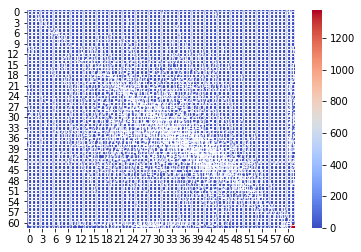

In [ ]:
#CONFUSION MATRIX IN THE FORM OF HEAT MAP
sns.heatmap(confusion_df_4, cmap='coolwarm', annot=True)


In [ ]:
#CHECK THE CLASSIFICATION REPORT
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions_4))


**Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           3       0.75      0.75      0.75         4
           4       0.50      1.00      0.67         1
           5       0.33      0.50      0.40         2
           6       0.20      0.33      0.25         3
           7       0.50      1.00      0.67         2
           8       0.44      1.00      0.62         4
           9       0.08      0.25      0.12         4
          10       0.12      0.14      0.13         7
          11       0.17      0.25      0.20         8
          12       0.21      0.33      0.26         9
          13       0.00      0.00      0.00        11
          14       0.14      0.33      0.20         9
          15       0.36      0.43      0.39        28
          16       0.12      0.19      0.15        32
          17       0.29      0.50      0.37        30
          18       0.21      0.42      0.28        31


In [ ]:
#STEP 5: DEPLOY THE MODEL
pred_new_4 = result_4.predict([[3844,7022,1,0,46,778,1,27,2964,952,66,12530,9097,0]])
pred_new_4

array([43])

**5.SVM**

In [ ]:
#STEP 3: TRAINING
#IMPORT THE REQUIRED LIBRARIES
from sklearn.svm import SVC
my_model_5 = SVC(kernel = 'rbf', random_state = 200)
result_5 = my_model_5.fit(X_train, y_train)

In [ ]:
predictions_5 = result_5.predict(X_test)
predictions_5

array([63, 44, 38, ..., 63, 45, 38])

In [ ]:
#STEP 4 :TESTING
#CHECK THE ACCURACY
print("Accuracy:",metrics.accuracy_score(y_test, predictions_5))

Accuracy: 0.352861562258314


In [ ]:
#CHECK THE CONFUSION MATRIX
confusion_mat_5 = confusion_matrix(y_test, predictions_5)
confusion_df_5 = pd.DataFrame(confusion_mat_5)
confusion_df_5

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,1,0,1,0,0,0,0,0,1,0,2,1,1,0,0,0,0
58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
59,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


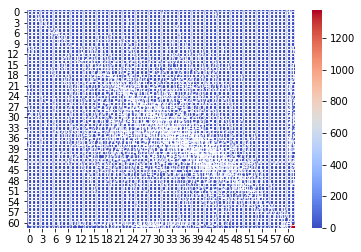

In [ ]:
#CONFUSION MATRIX IN FORM OF HEAT MAP
sns.heatmap(confusion_df_4, cmap='coolwarm', annot=True)



In [ ]:
#CHECK THE CLASSIFICATION REPORT
print('\n**Classification Report:\n',metrics.classification_report(y_test,predictions_5))


**Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         4
          10       0.00      0.00      0.00         7
          11       0.00      0.00      0.00         8
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00        11
          14       0.00      0.00      0.00         9
          15       0.50      0.04      0.07        28
          16       0.00      0.00      0.00        32
          17       0.00      0.00      0.00        30
          18       1.00      0.03      0.06        31


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#STEP 5: DEPLOY THE MODEL
pred_new_5 = result_5.predict([[3844,7022,1,0,46,778,1,27,2964,952,66,12530,9097,0]])
pred_new_5

array([63])

**CONCLUSION : SO BY APPLYING ALL THE ABOVE ALGORITHMS WE CAN SEE THAT RANDOM FOREST GIVES US THE BEST ACCURACY**